In [4]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm
from pmdarima import model_selection

from get_forex_data import get_daily_data, get_small_frequencies

from plot import plot_basic_close, pred_vs_real_plot

In [5]:
import yfinance as yf
yf.pdr_override()

## Fetch daily data

In [102]:
usd_jpy_daily = get_daily_data('USDJPY', '2023-01-01', '2023-09-09')

usd_jpy_daily.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-04,146.057007,146.490005,146.041000,146.057007,146.057007,0
2023-09-05,146.542999,147.716003,146.498001,146.542999,146.542999,0
2023-09-06,147.470993,147.796005,147.037003,147.470993,147.470993,0
2023-09-07,147.709000,147.865005,147.057007,147.709000,147.709000,0
2023-09-08,147.274002,147.869995,146.582993,147.809998,147.809998,0


## Plot the close price

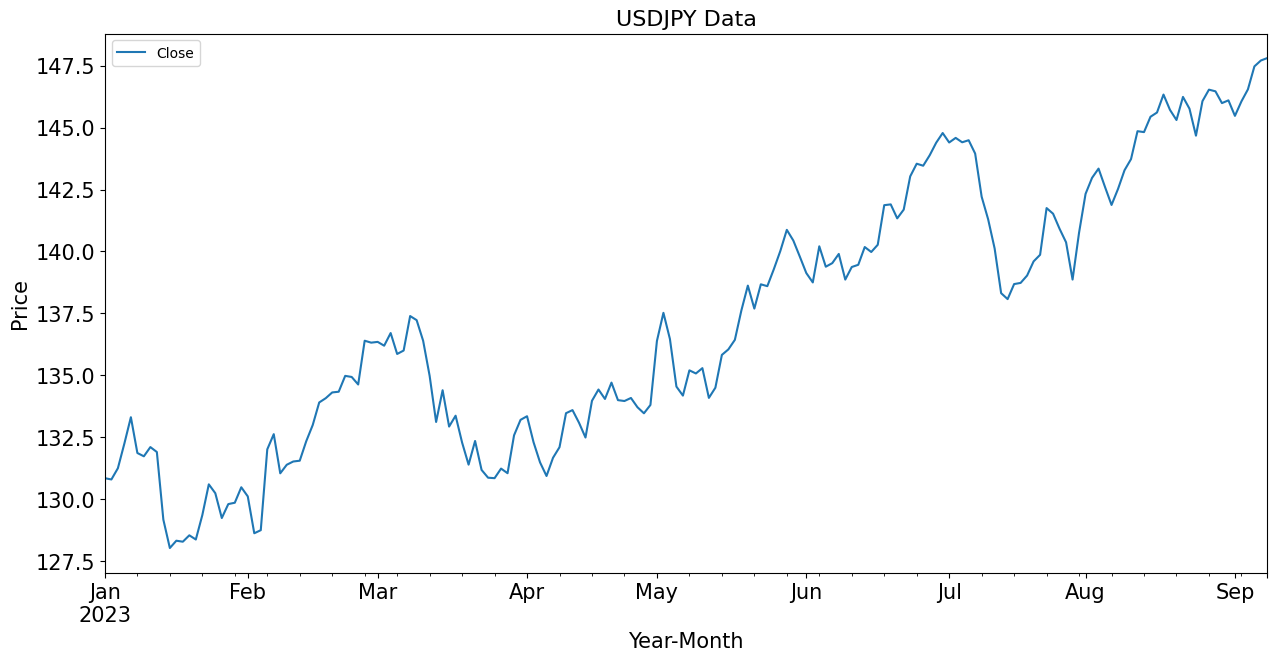

In [7]:
plot_basic_close((15,7), usd_jpy_daily, 'USDJPY')    

## Get Hourly Data

In [5]:
usd_jpy_hourly = get_small_frequencies('USDJPY', period='30d', interval='1h')
usd_jpy_hourly.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-09-08 17:00:00+01:00,147.699997,147.778000,147.658005,147.766006,147.766006,0
2023-09-08 18:00:00+01:00,147.764008,147.778000,147.695999,147.731995,147.731995,0
2023-09-08 19:00:00+01:00,147.733002,147.835007,147.703995,147.822006,147.822006,0
2023-09-08 20:00:00+01:00,147.822998,147.869995,147.804993,147.848999,147.848999,0
2023-09-08 21:00:00+01:00,147.845001,147.858994,147.806000,147.830994,147.830994,0


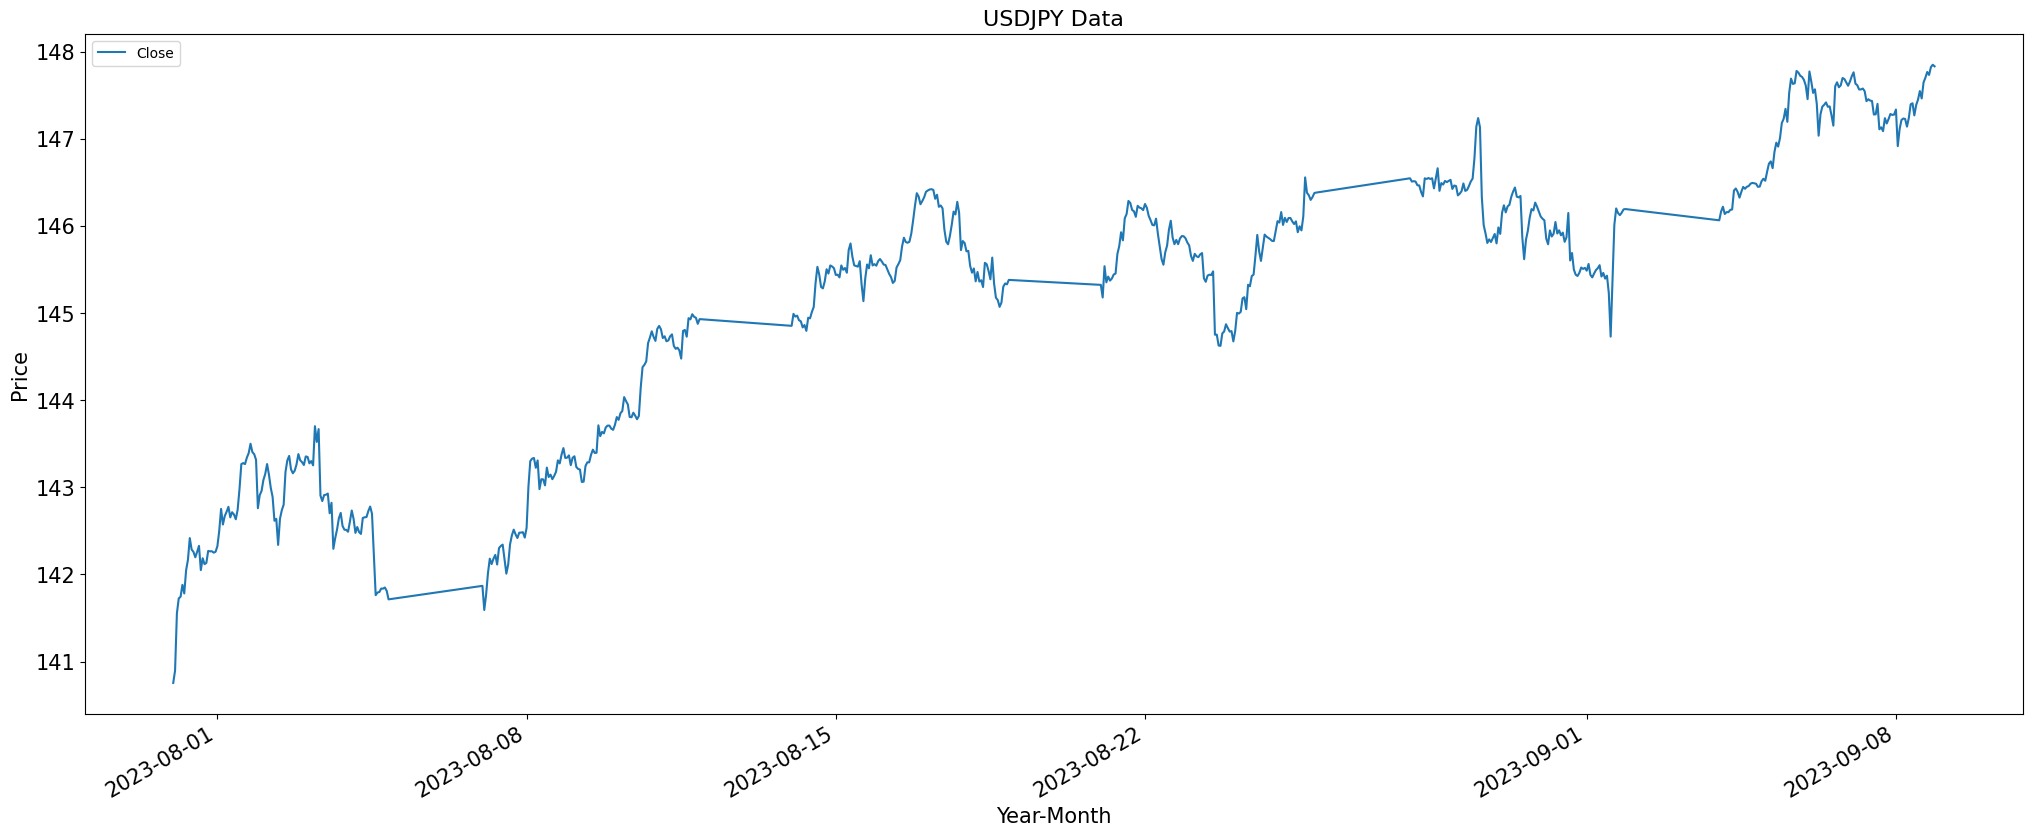

In [6]:
plot_basic_close((25,10), usd_jpy_hourly, 'USDJPY')   

## Daily Predicion

In [86]:
y = usd_jpy_daily['Adj Close']

In [92]:

est = pm.ARIMA(order=(1, 1, 2),
               seasonal_order=(0, 1, 1, 12),
               suppress_warnings=True)
cv = model_selection.SlidingWindowForecastCV(window_size=50, step=5, h=5)
validation = model_selection.cross_val_predict(
    est, y, cv=cv, verbose=2, averaging="median")

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................
[CV] fold=10 .........................................................
[CV] fold=11 .........................................................
[CV] fold=12 .........................................................
[CV] fold=13 .........................................................
[CV] f

In [93]:
x_axis = np.arange(y.shape[0])
n_test = validation.shape[0]

In [94]:
predictions.shape[0]

130

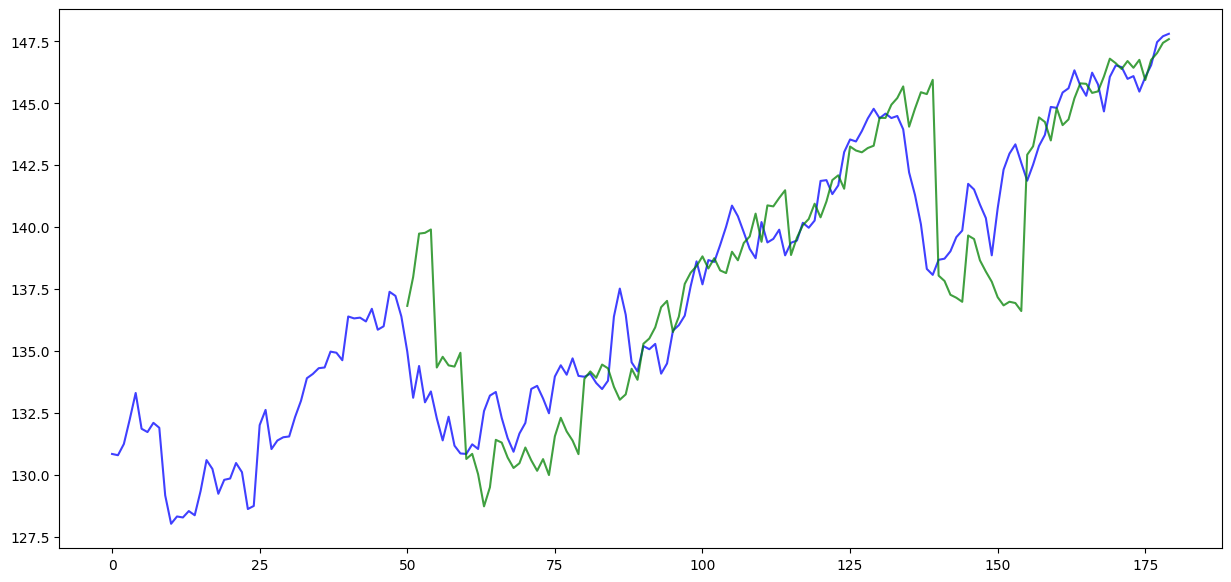

In [95]:
from plot import pred_vs_real_plot


    
    
pred_vs_real_plot(usd_jpy_daily, 'USDJPY', x_axis, y, validation, n_test)    

## Predict the next two weeks

In [99]:
predictions = est.fit(y).predict()

In [100]:
predictions = predictions.to_frame(name='predicted_close').reset_index(names='date')

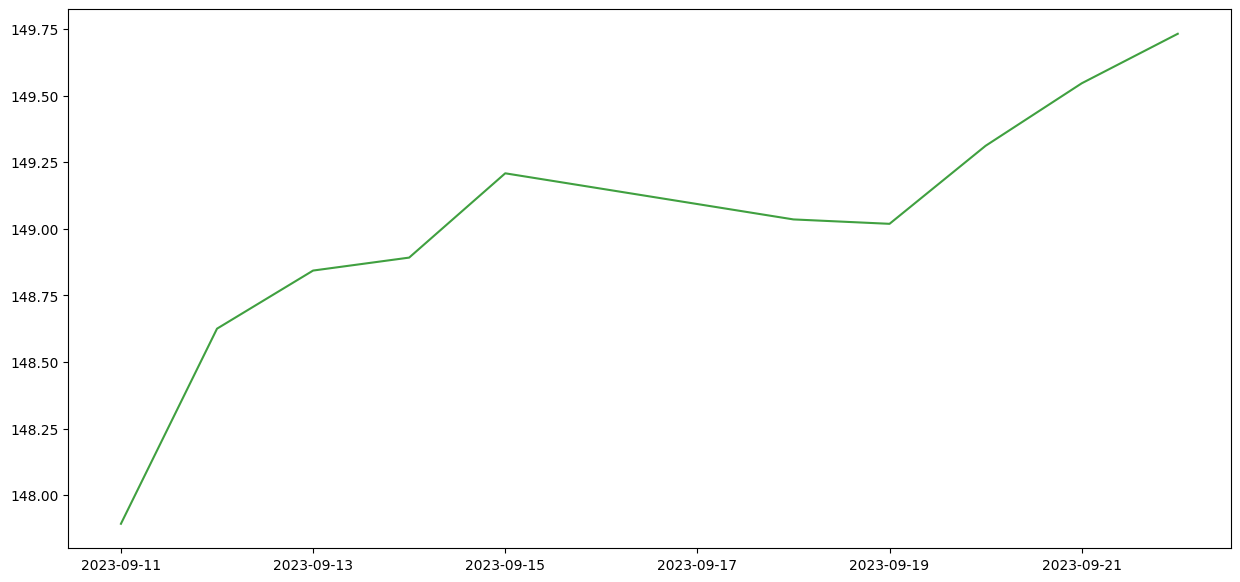

In [101]:
plt.figure(figsize=(15,7))
plt.plot(predictions.date, predictions.predicted_close, alpha=0.75, c='g') 

(180,)